# <span style="color:#54B1FF">Simulating Experiments:</span> &nbsp; <span style="color:#1B3EA9"><b>Meaning Of The P value</b></span>

<br>

To understand the meaning of classical hypothesis testing's p value, we need to simulate a number of experiments, just like in the previous notebook.  Before we do that, let's briefly reconsider the following one-sample t test results.

<br>

<img alt="one-sample" width=400 src="https://i1.wp.com/www.real-statistics.com/wp-content/uploads/2012/11/one-sample-t-test-1.png?w=552"/>

<br>

<br>

The t value is: <span style="color:blue">$\hspace{5mm} t = 1.449$</span>

The probability value is: <span style="color:blue">$\hspace{5mm} p = 0.088$</span>

<br>

In Lesson 08, we learned that the one-sample t value is defined as:

<center>$t = \frac{  \overline{y}   - \mu  }{  s / \sqrt{n}  }$</center>


Let's compute this value for each of the simulation iterations...

<br>

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
N      = 10      # number of experiments
n      = 12      # sample size
mu     = 0       # when H0 is true, the mean is zero
sigma  = 11.155  # assumed true standard deviation


np.random.seed(0)
tt     = []      # a list that will hold t values for each simulated experiment
for i in range(N):
    y  = mu + sigma * np.random.randn(n)  # random data sample
    m  = y.mean()                      # sample mean
    t  = (y.mean() - mu) / (  y.std(ddof=1) / n**0.5  )
    tt.append( t )

tt     = np.array( tt ) 

print(tt)

[ 2.68936728  0.17287614  0.26899574 -0.46519114 -1.90714838 -1.84713915
 -1.12772239  2.49083464  0.50702536  3.22500899]


<br>
<br>

Note that, like the sample mean, the t value also fluctuates.

Note also that we have begun to accumulate a distribution of t values, one value for each simulated experiment.  There are only 10 values now, so let's increase the number of experiments to 1000, then check the distribution... 

<br>

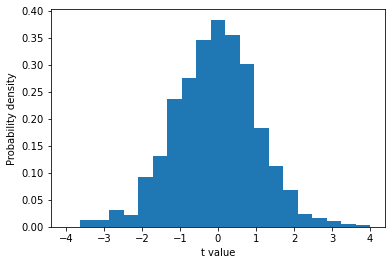

In [3]:
N      = 1000    # number of experiments


np.random.seed(0)
tt     = []      # a list that will hold t values for each simulated experiment
for i in range(N):
    y  = mu + sigma * np.random.randn(n)  # random data sample
    m  = y.mean()                         # sample mean
    t  = (y.mean() - mu) / (  y.std(ddof=1) / n**0.5  )
    tt.append( t )

tt     = np.array( tt ) 


plt.figure()
ax = plt.axes()
ax.hist(tt, bins=21, density=True, range=(-4, 4))
ax.set_xlabel('t value')
ax.set_ylabel('Probability density')
plt.show()

<br>
<br>

Note that, similar to the Normal distribution, most t values are close to zero, and very few values are greater than 3.0.

In Lesson 07 we learned that probability values can be computed numerically from distributions like this (see **"Numerical probability calculations in Python"**).

Let's first compute the probability that the t value is greater than zero:

<br>

In [4]:
p = ( tt > 0 ).mean()

print(p)

0.469


<br>
<br>

This probability value is close to 50\%.

This implies that about half of experiments are expected to produce $t>0$.

<br>

**How about the t value from the experiment?**

We can see in the table above that the t value from that experiment was: <span style="color:blue">$\hspace{5mm} t = 1.449$</span>

What is the probablity that the t value (in many experiments) is larger than this experimental t value? 

<br>

In [5]:
p = ( tt > 1.449 ).mean()

print(p)

0.076


<br>
<br>

This is not exactly the same value as reported in the experimental results (<span style="color:blue">$\hspace{5mm} p = 0.088 \hspace{5mm}$</span>), but it's close!

Let's increase the number of experiments to $N=10,000$, then re-check the numerical probability.

<br>

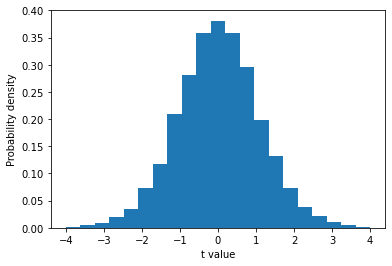

In [6]:
N      = 10000    # number of experiments


np.random.seed(0)
tt     = []      # a list that will hold t values for each simulated experiment
for i in range(N):
    y  = mu + sigma * np.random.randn(n)  # random data sample
    m  = y.mean()                         # sample mean
    t  = (y.mean() - mu) / (  y.std(ddof=1) / n**0.5  )
    tt.append( t )

tt     = np.array( tt ) 


plt.figure()
ax = plt.axes()
ax.hist(tt, bins=21, density=True, range=(-4, 4))
ax.set_xlabel('t value')
ax.set_ylabel('Probability density')
plt.show()

In [7]:
p = ( tt > 1.449 ).mean()

print(p)

0.0904


<br>
<br>

This is much closer to the reported p value !  (<span style="color:blue">$\hspace{5mm} p = 0.088 \hspace{5mm}$</span>)

&nbsp;

This implies that the p value means the following:

🟢🟢🟢🟢🟢🟢  <span style="color:green">!!! IMPORTANT !!!</span>

The p value represents <span style="color:blue">the proportion of an infinite number of experiments that produce $(t > t_\mathrm{observed})$ when $H_0$ is true</span>, where $t_\mathrm{observed}$ is the experimentally observed t value.

🟢🟢🟢🟢🟢🟢

<br>
<br>

Let's finally check how the numerical distribution above relates to mathematical theory...

<br>

<br>
<br>

___

## Analytical and numerical t distributions

The example above shows a numerical t distribution.

In **Lesson 07** we learned that many numerically-generated distributions have corresponding analytical distributions.

For the t value, the analytical distribution is called the [Student's t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution).  As shown in the figure below, the Student's t distribution is parameterized by the "degrees of freedom" ($\nu$); this parameter affect the distribution's shape.


<img alt="tdist" width=300 src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Student_t_pdf.svg/650px-Student_t_pdf.svg.png">

<br>

For the one-sample t test:  $\nu = n - 1$.


<br>

Let's compare the numerical and analytical distributions...

(See  <span style="color:blue">**"Sum-of-squares and the $\chi^2$ distribution"**</span> in  **Lesson 07** for a similar example.)

<br>

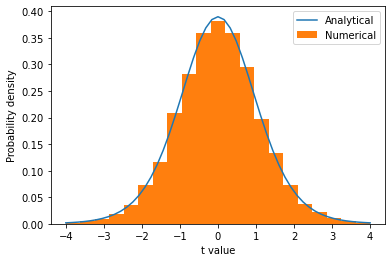

In [8]:
nu    = n - 1                   # degrees of freedom
x     = np.linspace(-4, 4, 51)  # t value range
pdf   = stats.t.pdf(x, nu)      # analytical PDF for the Student's t distribution



plt.figure()
ax = plt.axes()
ax.plot(x, pdf, label='Analytical')
ax.hist(tt, density=True, bins=21, label='Numerical', range=(-4, 4))
ax.legend()
ax.set_xlabel('t value')
ax.set_ylabel('Probability density')
plt.show()


<br>
<br>

___

## Summary

* Experiments can be simulated numerically.

* t values (and other statistics) can be computed for each simulated experiment.

* When $H_0$ is true, t values from simulated experiments converge to the analytical Student's t distribution as the number of experiments increases.

* A p value from hypothesis testing means: <span style="color:blue">the proportion of an infinite number of experiments that produce $(z > z_\mathrm{observed})$ when $H_0$ is true</span>, where $z$ is a test statistic like the t statistic
